<a href="https://colab.research.google.com/github/SichenPa221/Robot_localization/blob/main/robot_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

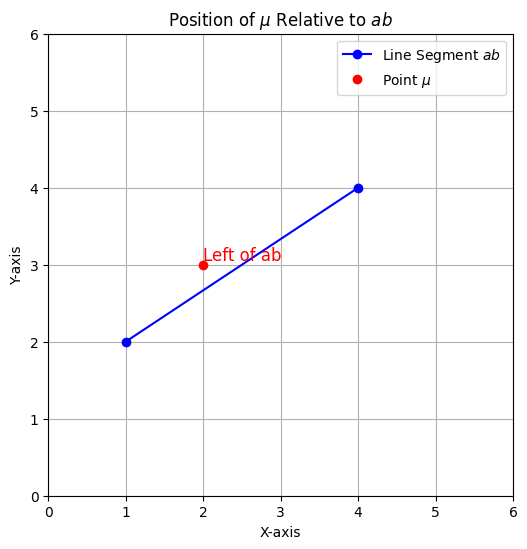

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define points a, b, and mu
a = np.array([1, 2])  # Coordinates of point a
b = np.array([4, 4])  # Coordinates of point b
mu = np.array([2, 3]) # Coordinates of point mu

# Calculate the determinant
det = np.linalg.det(np.vstack((b - a, mu - a)))

# Create a plot
plt.figure(figsize=(6, 6))

# Plot the line segment ab
plt.plot([a[0], b[0]], [a[1], b[1]], 'bo-', label='Line Segment $ab$')

# Plot point mu
plt.plot(mu[0], mu[1], 'ro', label='Point $\mu$')

# Add text to indicate the side of mu
if det > 0:
    plt.text(mu[0], mu[1], 'Left of ab', fontsize=12, color='red', verticalalignment='bottom')
else:
    plt.text(mu[0], mu[1], 'Right of ab', fontsize=12, color='red', verticalalignment='bottom')

# Set plot limits and labels
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Position of $\mu$ Relative to $ab$')
plt.show()


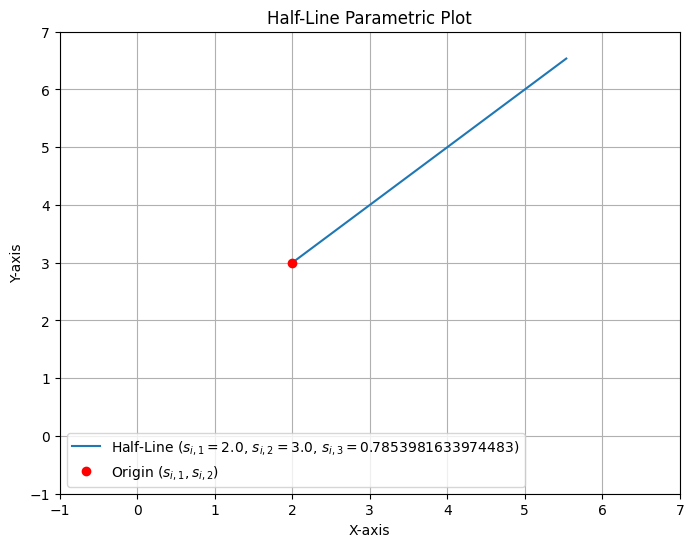

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
s_i = np.array([2.0, 3.0, np.pi/4.0])  # Origin (x, y, orientation)
t_values = np.linspace(0, 5, 100)      # Values of t for plotting the half-line

# Calculate the coordinates of points on the half-line using the parametric equations
x1 = s_i[0] + t_values * np.cos(s_i[2])
x2 = s_i[1] + t_values * np.sin(s_i[2])

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x1, x2, label=f'Half-Line ($s_{{i,1}}={s_i[0]}$, $s_{{i,2}}={s_i[1]}$, $s_{{i,3}}={s_i[2]}$)')

# Mark the origin point
plt.plot(s_i[0], s_i[1], 'ro', label='Origin ($s_{i,1}, s_{i,2}$)')

# Set plot limits and labels
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Half-Line Parametric Plot')
plt.show()


# Mobile Robot model building

#### In this section, we have installed 4 miniature ultrasonic sensors on the mobile robot to detect the distance between the robot and the wall.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Robot_Room_location:
  walls = np.array([])
  nb_walls = 0

  p = np.array([])

  sensors = np.array([])
  nb_sensors = 0

  def __init__(self,p):
    # Location of walls (global frame)
    self.walls = np.array([[[0,0],[0,4]],
                  [[0,4],[3,4]],
                  [[3,4],[3,3]],
                  [[3,3],[5,3]],
                  [[5,3],[5,0]],
                  [[5,0],[0,0]]])

    self.nb_walls = self.walls.shape[0]

    # Location of sensors (robot frame) (pose and oriantation )
    self.sensors = np.array([[0.5,0.25,np.pi/4],
              [0.5,-0.25,-np.pi/4],
              [-0.5,0.25,3*np.pi/4],
              [-0.5,-0.25,-3*np.pi/4]])

    self.nb_sensors = self.sensors.shape[0]

    # Position and orientation of robot frame
    self.p = p

    self.y = self.get_sensor_readings()


  # Gets sensor location and orientation in global frame
  def sensor_glob_frame(self):
    s = np.zeros([self.nb_sensors,3])

    for m in range(self.nb_sensors):
      s[m,0] = self.p[0]+self.sensors[m,0]*np.cos(self.p[2])-self.sensors[m,1]*np.sin(self.p[2])
      s[m,1] = self.p[1]+self.sensors[m,0]*np.sin(self.p[2])+self.sensors[m,1]*np.cos(self.p[2])
      s[m,2] = self.sensors[m,2] + self.p[2]

    return s


  def set_location(self,p):
    self.p = p
  # Check whether sensor on right side of wall
  # Here we use the vectors cross prodact to express the sensor is the righ or left of the wall A*B
  def visible(self,s,wall):
      a_b = wall[1]-wall[0]
      a_s = s[0:2] - wall[0]
      if (a_b[0]*a_s[1]-a_b[1]*a_s[0]<0):
          return 1
      else:
          return 0
  # Get Sensor Reading
  def get_sensor_readings(self):
    # potential intersections
    x = np.zeros(2)

    # candidate distances hete we have 4 sense, so the candidate distance (4*n)
    d = np.zeros([self.nb_sensors,self.nb_walls])


    # simulated distances we get a matrix (4*1)
    ym = np.zeros(self.nb_sensors)

    s = self.sensor_glob_frame()

    #print('sensor_glob_frame', s)

    for i in range(self.nb_sensors): # sensor intetation
      #print('Sensor ',i, ' wave ')
      for m in range(self.nb_walls):  # wall interation
        if self.visible(s[i,:],self.walls[m]): # here, we indicate the detect condition
              a = self.walls[m,0]
              b = self.walls[m,1]

              t_prime = ((a[0]-s[i,0])*np.sin(s[i,2])-(a[1]-s[i,1])*np.cos(s[i,2])) \
                        /((a[0]-b[0])*np.sin(s[i,2])-(a[1]-b[1])*np.cos(s[i,2]))

              t = ((a[0]-s[i,0])*(a[1]-b[1])-(a[1]-s[i,1])*(a[0]-b[0])) \
                  /((a[1]-b[1])*np.cos(s[i,2])-(a[0]-b[0])*np.sin(s[i,2]))

              if ((t>=0) & (t_prime>=0) & (t_prime <=1)):
                  #print ('hits wall ',self.walls[m])
                  x[0] = s[i,0] + t*np.cos(s[i,2])
                  x[1] = s[i,1] + t*np.sin(s[i,2])
                  #print(' at ', x)

                  d[i,m] = np.sqrt((x[0]-s[i,0])**2+(x[1]-s[i,1])**2)
              else:
                  d[i,m] = np.Infinity

        else:
              d[i,m] = np.Infinity

    ym = np.min(d,1)

    return ym

        # Plots
  def plot(self):
      # Walls
      for m in range(self.nb_walls):
          plt.plot(self.walls[m,:,0], self.walls[m,:,1], 'b', linestyle="-")

      # Sensors
      s = self.sensor_glob_frame()
      for i in range(self.nb_sensors):
          plt.plot([s[i,0],s[i,0] + self.y[i]*np.cos(s[i,2])], \
                    [s[i,1],s[i,1] + self.y[i]*np.sin(s[i,2])], 'ro', linestyle="--")

      plt.axis('square')
      plt.show()





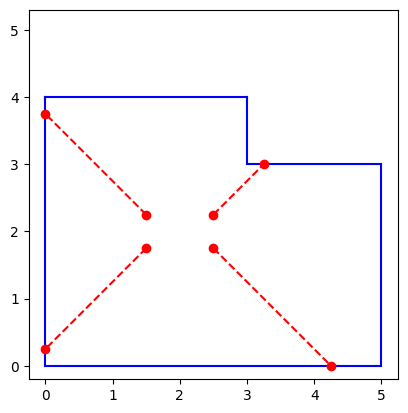

Simulated distances :  [1.06066017 2.47487373 2.12132034 2.12132034]


In [5]:
if __name__ == "__main__":
  p_star = np.array([2,2,0])

  myproblem = Robot_Room_location(p_star)

  ym = myproblem.get_sensor_readings()

  myproblem.plot()

  print('Simulated distances : ',ym)



 ## Exercise 2
 ### IN THIS SECTION,We want use Linear least squares (LLS)  to get the best robot position estimation

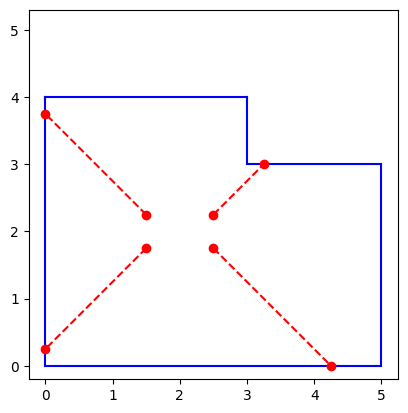

Simulated distances :  [1.06066017 2.47487373 2.12132034 2.12132034]
p1 size (100,) p2 size (80,)
Minimum for j_ls:
p1 = 2.0
p2 = 2.0

Minimum for j_lav:
p1 = 2.0
p2 = 2.0


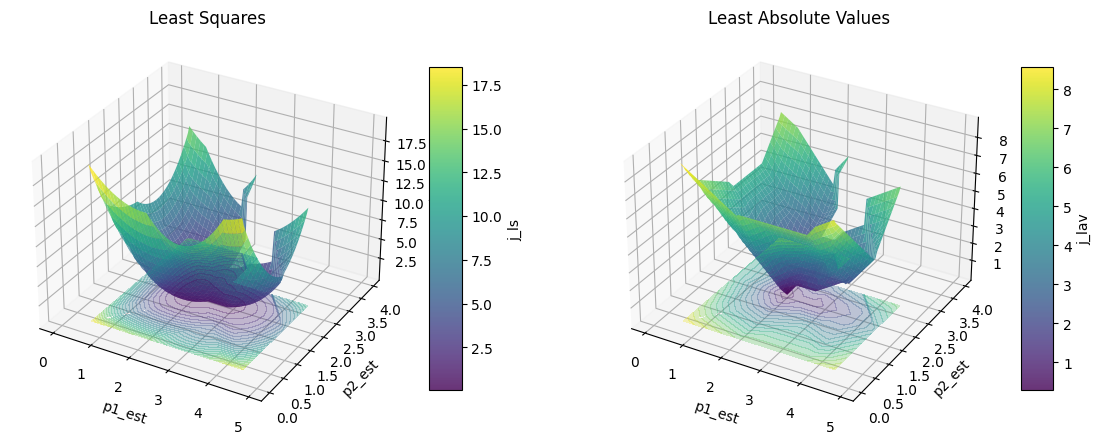

In [9]:
if __name__ == "__main__":
  p_star = np.array([2,2,0])

  myproblem = Robot_Room_location(p_star)

  ym = myproblem.get_sensor_readings()

  myproblem.plot()

  print('Simulated distances : ',ym)

  # Exercise 2
  # give the sensor info to estimate the robot location
  y = np.array([1.06,2.48,2.12,2.12])

  # set the robot postion range
  p1 = np.arange(0, 5, 0.05)
  p2 = np.arange(0, 4, 0.05)

  print('p1 size',p1.shape,'p2 size',p2.shape)

  p1_est,p2_est = np.meshgrid(p1,p2, indexing='ij')

  j_ls = np.zeros([len(p1),len(p2)])
  j_lav = np.zeros([len(p1),len(p2)])

  for i in range(len(p1)):
    for j in range(len(p2)):
        myproblem.set_location(np.array([p1[i],p2[j],0]))
        ym = myproblem.get_sensor_readings()

        j_ls[i,j] = np.sum((y-ym)**2)
        j_lav[i,j] = np.sum(np.absolute(y-ym))

  # Find the indices of the minimum values in j_ls and j_lav
  min_index_j_ls = np.unravel_index(np.argmin(j_ls, axis=None), j_ls.shape)
  min_index_j_lav = np.unravel_index(np.argmin(j_lav, axis=None), j_lav.shape)

  # Get the corresponding values of p1 and p2
  p1_min_j_ls, p2_min_j_ls = p1[min_index_j_ls[0]], p2[min_index_j_ls[1]]
  p1_min_j_lav, p2_min_j_lav = p1[min_index_j_lav[0]], p2[min_index_j_lav[1]]

  print("Minimum for j_ls:")
  print("p1 =", p1_min_j_ls)
  print("p2 =", p2_min_j_ls)

  print("\nMinimum for j_lav:")
  print("p1 =", p1_min_j_lav)
  print("p2 =", p2_min_j_lav)



# fig = plt.figure(figsize=(14, 7))

# # First subgraph
# ax1 = fig.add_subplot(1, 2, 1)
# #ax1.plot_surface(p1_est, p2_est, j_ls, cmap="viridis")
# ax1.contour(p1_est, p2_est, j_ls,30)
# ax1.set_title("Least squares")

# # Second sous-graphique (surface)
# ax2 = fig.add_subplot(1, 2, 2)
# #ax2.plot_surface(p1_est, p2_est, j_lav, cmap="viridis")
# ax2.contour(p1_est, p2_est, j_lav,20)
# ax2.set_title("Least absolute values")

# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming p1_est, p2_est, j_ls, and j_lav are defined

# Create a new figure
fig = plt.figure(figsize=(14, 7))

# First subgraph for Least Squares
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(p1_est, p2_est, j_ls, cmap="viridis", alpha=0.8)
contour = ax1.contourf(p1_est, p2_est, j_ls, 30, zdir='z', offset=np.min(j_ls), cmap="viridis", alpha=0.3)
ax1.set_title("Least Squares")
ax1.set_xlabel("p1_est")
ax1.set_ylabel("p2_est")
ax1.set_zlabel("j_ls")
fig.colorbar(surf, ax=ax1, shrink=0.6, aspect=10, label="j_ls")

# Second subgraph for Least Absolute Values
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(p1_est, p2_est, j_lav, cmap="viridis", alpha=0.8)
contour = ax2.contourf(p1_est, p2_est, j_lav, 20, zdir='z', offset=np.min(j_lav), cmap="viridis", alpha=0.3)
ax2.set_title("Least Absolute Values")
ax2.set_xlabel("p1_est")
ax2.set_ylabel("p2_est")
ax2.set_zlabel("j_lav")
fig.colorbar(surf, ax=ax2, shrink=0.6, aspect=10, label="j_lav")

plt.show()


## The maximume Likelihood Function

#### To find the parameter values that minimize the maximum absolute difference between y and ym, you're essentially looking for the parameter values that minimize the "worst-case" error between your observed data and the model predictions. This is sometimes referred to as minimizing the L-infinity norm.

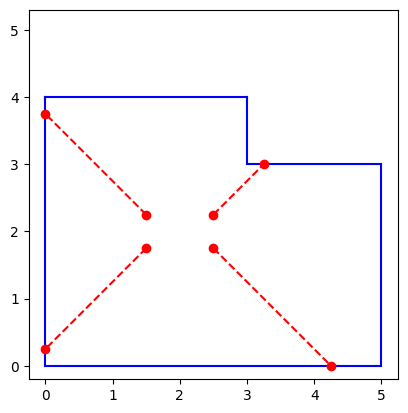

Simulated distances :  [1.06066017 2.47487373 2.12132034 2.12132034]
Minimum of the maximum absolute difference:
p1 = 1.75
p2 = 2.5


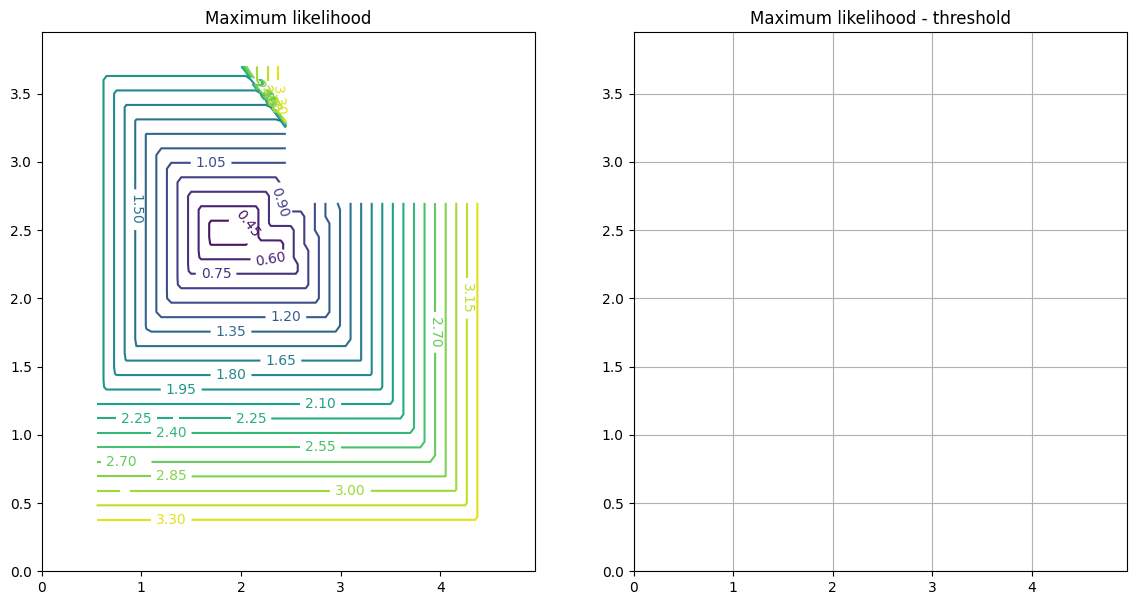

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from matplotlib import cm
# matplotlib qt

class Robot_in_Room:
    walls = np.array([])
    nb_walls = 0

    p = np.array([])

    sensors = np.array([])
    nb_sensors = 0

    y = np.array([])

    def __init__(self,p):
        # Location of walls (global frame)
        self.walls = np.array([[[0,0],[0,4]],
                          [[0,4],[3,4]],
                          [[3,4],[3,3]],
                          [[3,3],[5,3]],
                          [[5,3],[5,0]],
                          [[5,0],[0,0]]])

        self.nb_walls = self.walls.shape[0]

        # Location of sensors (robot frame)
        self.sensors = np.array([[0.5,0.25,np.pi/4],
                                 [0.5,-0.25,-np.pi/4],
                                 [-0.5,0.25,3*np.pi/4],
                                 [-0.5,-0.25,-3*np.pi/4]])

        self.nb_sensors = self.sensors.shape[0]

        # Position and orientation of robot frame
        self.p = p

        self.y = self.get_sensor_readings()

    # Gets sensor location and orientation in global frame
    def sensor_glob_frame(self):
        s = np.zeros([self.nb_sensors,3])
        for m in range(self.nb_sensors):
            s[m,0] = self.p[0]+self.sensors[m,0]*np.cos(self.p[2])-self.sensors[m,1]*np.sin(self.p[2])
            s[m,1] = self.p[1]+self.sensors[m,0]*np.sin(self.p[2])+self.sensors[m,1]*np.cos(self.p[2])
            s[m,2] = self.sensors[m,2] + self.p[2]

        return s

    # Check whether sensor on right side of wall
    def visible(self,s,wall):
        a_b = wall[1]-wall[0]
        a_s = s[0:2] - wall[0]
        if (a_b[0]*a_s[1]-a_b[1]*a_s[0]<0):
            return 1
        else:
            return 0

    def set_location(self,p):
        self.p = p

    # Get Sensor Readings
    def get_sensor_readings(self):
        # potential intersections
        x = np.zeros(2)

        # candidate distances
        d = np.zeros([self.nb_sensors,self.nb_walls])

        # simulated distances
        ym = np.zeros(self.nb_sensors)

        s = self.sensor_glob_frame()
        for i in range(self.nb_sensors):
            for m in range(self.nb_walls):
                if self.visible(s[i,:],self.walls[m]):
                    a = self.walls[m,0]
                    b = self.walls[m,1]

                    t_prime = ((a[0]-s[i,0])*np.sin(s[i,2])-(a[1]-s[i,1])*np.cos(s[i,2])) \
                              /((a[0]-b[0])*np.sin(s[i,2])-(a[1]-b[1])*np.cos(s[i,2]))

                    t = ((a[0]-s[i,0])*(a[1]-b[1])-(a[1]-s[i,1])*(a[0]-b[0])) \
                        /((a[1]-b[1])*np.cos(s[i,2])-(a[0]-b[0])*np.sin(s[i,2]))

                    if ((t>=0) & (t_prime>=0) & (t_prime <=1)):
                        x[0] = s[i,0] + t*np.cos(s[i,2])
                        x[1] = s[i,1] + t*np.sin(s[i,2])

                        d[i,m] = np.sqrt((x[0]-s[i,0])**2+(x[1]-s[i,1])**2)
                    else:
                        d[i,m] = np.Infinity

                else:
                    d[i,m] = np.Infinity

        ym = np.min(d,1)

        return ym

    # Plots
    def plot(self):
        # Walls
        for m in range(self.nb_walls):
            plt.plot(self.walls[m,:,0], self.walls[m,:,1], 'b', linestyle="-")

        # Sensors
        s = self.sensor_glob_frame()
        for i in range(self.nb_sensors):
            plt.plot([s[i,0],s[i,0] + self.y[i]*np.cos(s[i,2])], \
                     [s[i,1],s[i,1] + self.y[i]*np.sin(s[i,2])], 'ro', linestyle="--")

        plt.axis('square')
        plt.show()

# Exercise 1
p_star = np.array([2,2,0])

myproblem = Robot_in_Room(p_star)

ym = myproblem.get_sensor_readings()

myproblem.plot()

print('Simulated distances : ',ym)

# Exercise 2
y = np.array([1.06,3.48,2.12,2.12])

p1 = np.arange(0, 5, 0.05)
p2 = np.arange(0, 4, 0.05)

threshold = 0.01

p1_est,p2_est = np.meshgrid(p1,p2, indexing='ij')

j_ml = np.zeros([len(p1),len(p2)])
j_mlt = np.zeros([len(p1),len(p2)])

for i in range(len(p1)):
    for j in range(len(p2)):
        myproblem.set_location(np.array([p1[i],p2[j],0.0]))
        ym = myproblem.get_sensor_readings()

        j_ml[i,j] = np.max(np.abs(y-ym))
# Find the indices of the minimum value in j_ml
min_index_j_ml = np.unravel_index(np.argmin(j_ml, axis=None), j_ml.shape)

# Get the corresponding values of p1 and p2
p1_min_j_ml, p2_min_j_ml = p1[min_index_j_ml[0]], p2[min_index_j_ml[1]]

print("Minimum of the maximum absolute difference:")
print("p1 =", p1_min_j_ml)
print("p2 =", p2_min_j_ml)

fig = plt.figure(figsize=(14, 7))

# Graph
ax1 = fig.add_subplot(1, 2, 1)
cs = ax1.contour(p1_est, p2_est, j_ml,20)
ax1.clabel(cs, inline=True, fontsize=10)
ax1.set_title("Maximum likelihood")

ax2 = fig.add_subplot(1, 2, 2)
cs = ax2.contour(p1_est, p2_est, j_ml<threshold,2)
ax2.clabel(cs, inline=True, fontsize=10)
ax2.grid()
ax2.set_title("Maximum likelihood - threshold")


plt.show()


Cost : 909.0
Gradient (finite differences) : [-2405.99997596  -599.99999849]
Exact gradient : [-2406.  -600.]
Maximum iteration count reached
x:  [0.92952897 0.8639364 ]
j(x):  0.004966935094651118
g(x):  [-0.10833189 -0.01754123]
Iterations:  1001


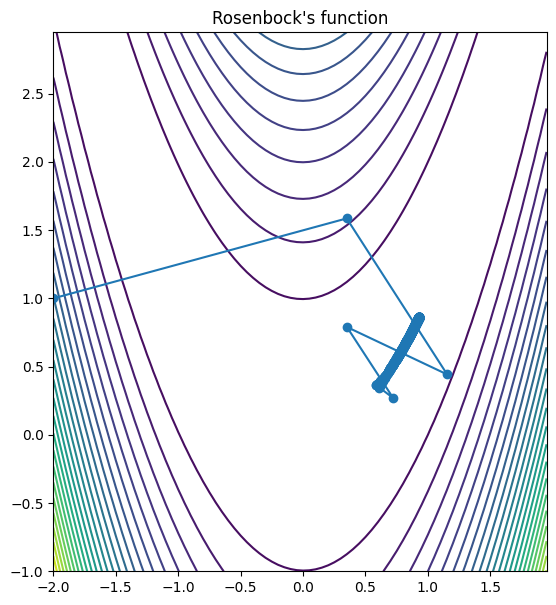

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock
def criterion(x):
    f = (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
    return f

# Gradient
def gradient_fd(x):
    j0 = criterion(x)
    eps = 1e-8 # step size

    g = np.zeros(len(x))

    for i in range(len(x)):
        x_prime = x.copy()
        x_prime[i] = x_prime[i] + eps
        j_prime = criterion(x_prime)

        g[i] = (j_prime-j0)/eps

    return g

def gradient(x):
    g = np.array([-2*(1-x[0])-400*x[0]*(x[1]-x[0]**2),200*(x[1]-x[0]**2)])

    return g

# Minimization by gradient descent
x0 = np.array([-2.0, 1])

# Array to store the iterates
x = np.array([x0])

# Initial evaluation
j0 = criterion(x0)
g0 = gradient(x0)
g00 = gradient_fd(x0)

print('Cost :',j0)
print('Gradient (finite differences) :',g00)
print('Exact gradient :',g0)

finished = False
eps_j = 1e-8
eps_g = 1e-6
k_max = 1000
k = 0

while not finished:

    # line search
    alpha = 1
    beta = 1e-4
    #Approximate line search (Backtracking-Armijo)
    while criterion(x0-alpha*g0) > j0-alpha*beta*sum(g0**2):
        alpha = alpha/2

    x1 = x0-alpha*g0
    x = np.append(x,x1)

    j1 = criterion(x1)
    g1 = gradient(x1)

    if j0-j1 < eps_j:
        print("Too small decrease of cost")
        finished = True

    if np.sum(g1**2) < eps_g:
        print("Too small gradient")
        finished = True

    if k >= k_max:
        print("Maximum iteration count reached")
        finished = True

    j0 = j1
    g0 = g1
    x0 = x1

    k = k+1

print('x: ',x0)
print('j(x): ',j0)
print('g(x): ',g0)
print('Iterations: ',k)

# Contour plot
x1 = np.arange(-2, 2, 0.05)
x2 = np.arange(-1, 3, 0.05)

x1_est,x2_est = np.meshgrid(x1,x2, indexing='ij')

rosen = np.zeros([len(x1),len(x2)])

for i in range(len(x1)):
    for j in range(len(x2)):
        rosen[i,j] = criterion([x1[i],x2[j]])

fig = plt.figure(figsize=(14, 7))

# First subgraph
ax1 = fig.add_subplot(1, 2, 1)
#ax1.plot_surface(p1_est, p2_est, j_ls, cmap="viridis")
ax1.contour(x1_est, x2_est, rosen,30)
ax1.set_title("Rosenbock's function")

ax1.plot(x[0::2], x[1::2],'-o')
plt.show()


In [6]:
class GradientDescent:
    def __init__(self, function, gradient, initial_point, alpha=0.01, beta=1e-4, max_iterations=1000, eps_j=1e-8, eps_g=1e-6):
        self.function = function
        self.gradient = gradient
        self.current_point = initial_point
        self.alpha = alpha
        self.beta = beta
        self.max_iterations = max_iterations
        self.eps_j = eps_j
        self.eps_g = eps_g
        self.path = [initial_point]

    def backtracking_line_search(self):
        while self.function(self.current_point - self.alpha * self.gradient(self.current_point)) > self.function(self.current_point) - self.alpha * self.beta * sum(self.gradient(self.current_point)**2):
            self.alpha /= 2

    def optimize(self):
        iteration = 0
        while iteration < self.max_iterations:
            current_value = self.function(self.current_point)
            current_gradient = self.gradient(self.current_point)

            # Stop if the gradient is small
            if sum(current_gradient**2) < self.eps_g:
                print("Converged due to small gradient.")
                break

            # Backtracking line search
            self.backtracking_line_search()

            # Update the current point
            self.current_point = self.current_point - self.alpha * current_gradient
            self.path.append(self.current_point)

            # Check the change in function value
            if abs(self.function(self.current_point) - current_value) < self.eps_j:
                print("Converged due to small change in function value.")
                break

            iteration += 1

        if iteration == self.max_iterations:
            print("Max iterations reached.")
        return self.current_point

    def get_path(self):
        return self.path


In [7]:
# Example using Rosenbrock's function
def rosenbrock(x):
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

def gradient(x):
    return np.array([-2*(1-x[0])-400*x[0]*(x[1]-x[0]**2), 200*(x[1]-x[0]**2)])

initial_point = np.array([-2.0, 1])

optimizer = GradientDescent(rosenbrock, gradient, initial_point)
optimal_point = optimizer.optimize()
print("Optimal Point:", optimal_point)

# To get the path of the points during optimization
path = optimizer.get_path()
print("Path:", path)


Max iterations reached.
Optimal Point: [1.18077374 1.39487586]
Path: [array([-2.,  1.]), array([1.0075, 1.75  ]), array([1.37770916, 1.56626406]), array([1.14819021, 1.64921868]), array([1.33777513, 1.5664992 ]), array([1.18767305, 1.62228498]), array([1.31292957, 1.56935555]), array([1.21077037, 1.60796268]), array([1.2962068 , 1.57246323]), array([1.22567278, 1.59938544]), array([1.28462217, 1.57510752]), array([1.23564312, 1.59389417]), array([1.27649764, 1.57712411]), array([1.24241187, 1.59020464]), array([1.27076483, 1.57855029]), array([1.247028  , 1.58762353]), array([1.2667025 , 1.57948736]), array([1.25017165, 1.58574933]), array([1.26381079, 1.58004428]), array([1.25229928, 1.58433764]), array([1.26173962, 1.5803166 ]), array([1.25372285, 1.58323417]), array([1.26024303, 1.58038087]), array([1.25465755, 1.58233878]), array([1.25914819, 1.58029548]), array([1.25525254, 1.58158515]), array([1.25833385, 1.5801036 ]), array([1.25561146, 1.58092872]), array([1.25771505, 1.5798365